# MAT281 - Laboratorio N°10



<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0}) # target 
df.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.
1. Normalizar las variables numéricas con el método **StandardScaler**.
3. Realizar un método de reducción de dimensionalidad visto en clases.
4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. además, calcule las respectivas métricas. Concluya.




## 1.-

In [4]:
df.shape

(569, 32)

In [5]:
df.isnull().sum(axis = 0)

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
diagnosis                569.0  3.725835e-01  4.839180e-01     0.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
diagnosis                     0.000000       0.000000  1.000000e+00   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.3

In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
df["diagnosis"].unique()

array([1, 0], dtype=int64)

In [9]:
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

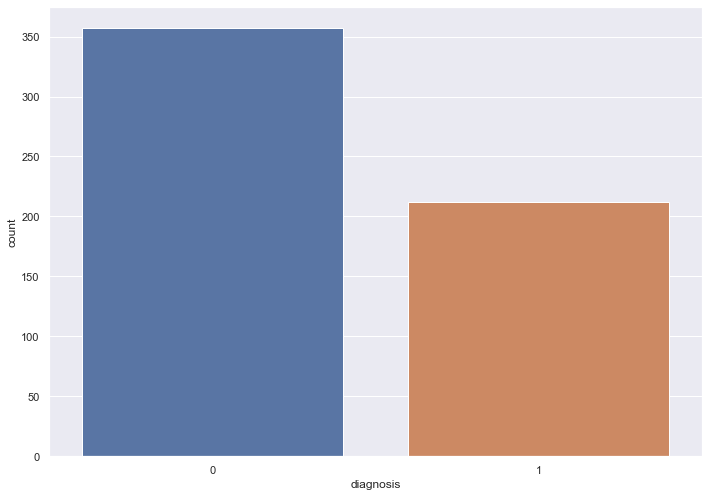

In [10]:
sns.countplot(df["diagnosis"])

los datos medianamente distribuidos

In [11]:
data=df.drop(["id"],axis=1)

In [12]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [13]:
data.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<AxesSubplot:>

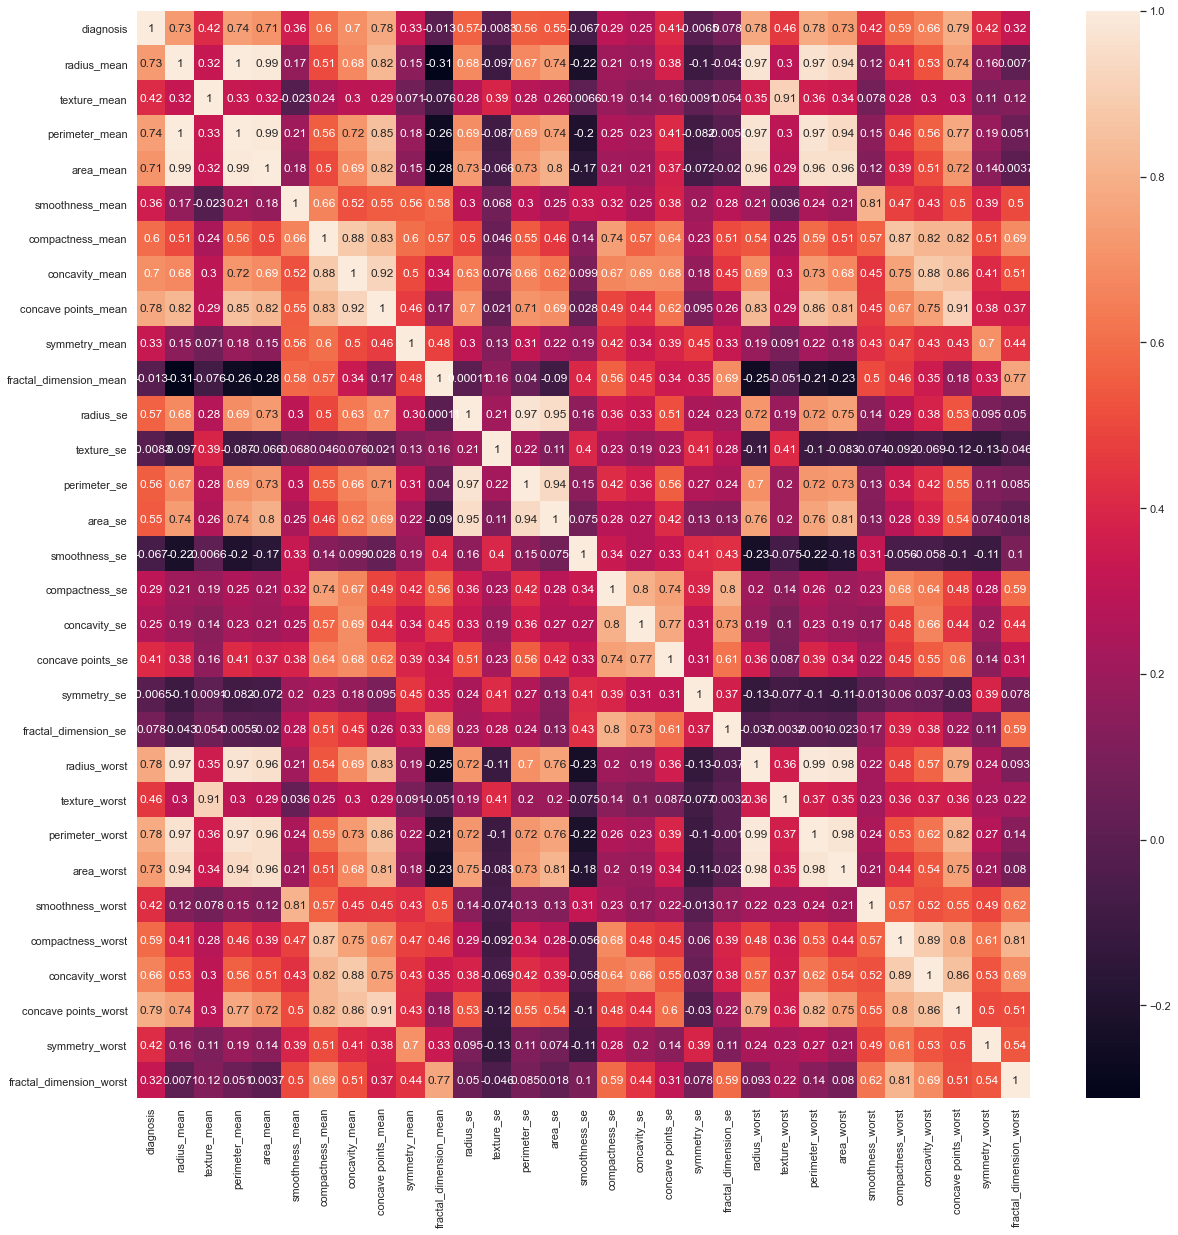

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

heat map

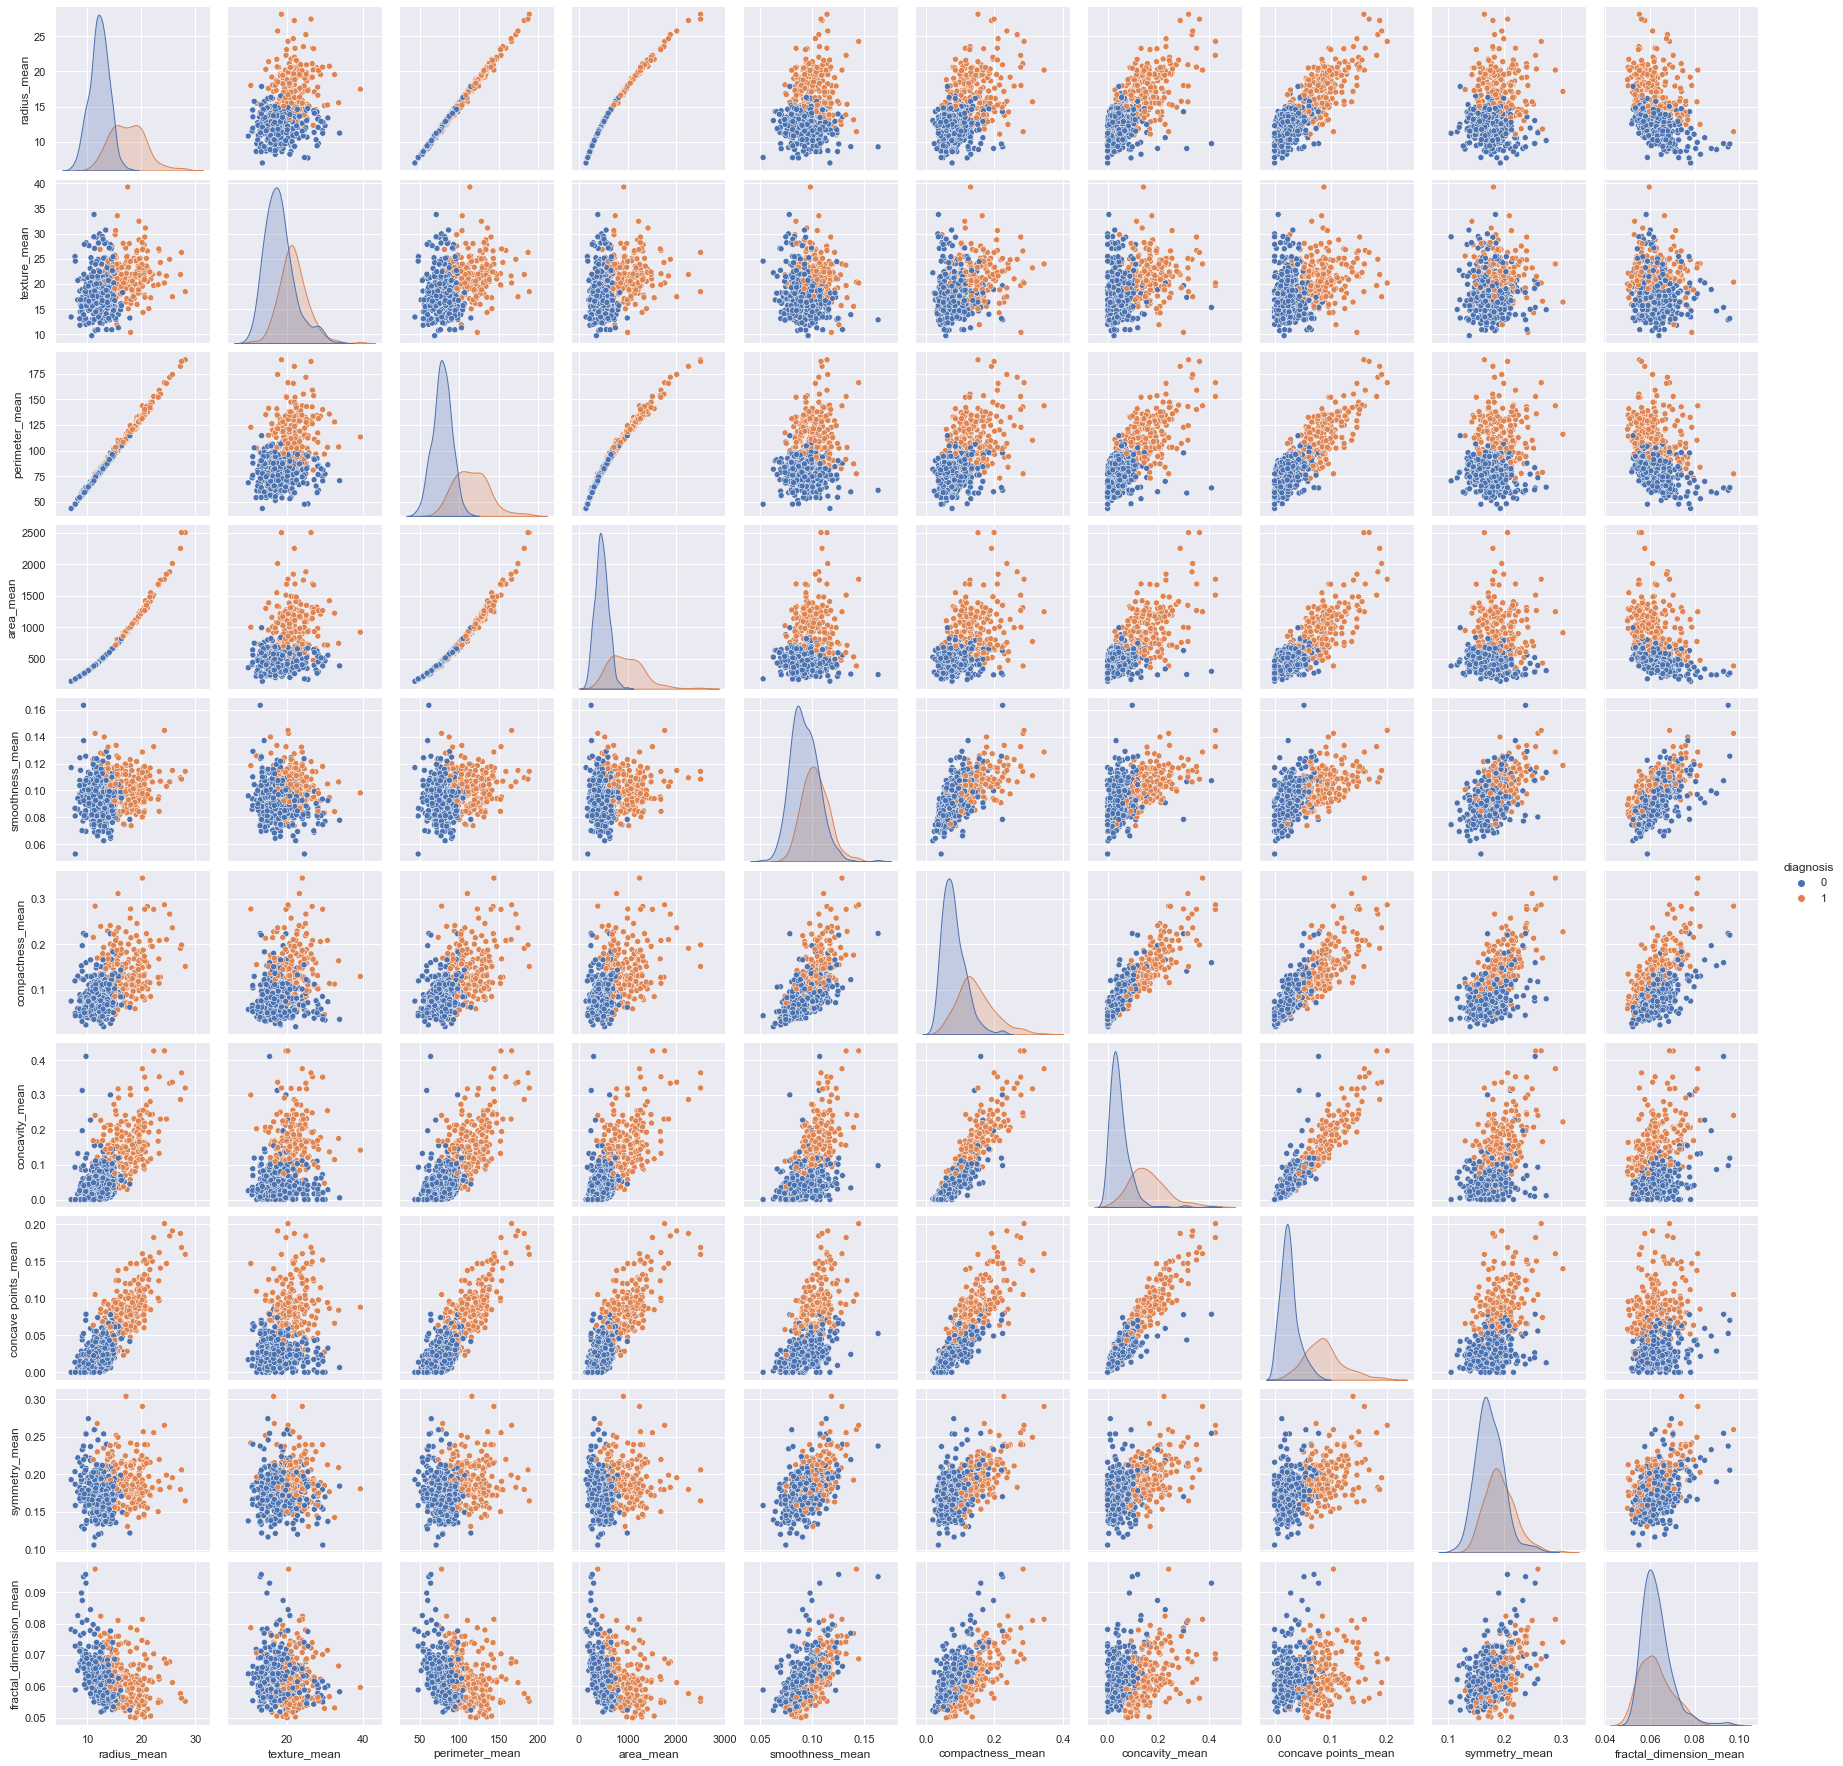

In [15]:
means=['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
sns.pairplot(data=data[means],hue="diagnosis")

notamos algunas correlaciones muy lineales como perimeter mean con radius mean, no es necesario ni aconsesable conservar ambos atributos

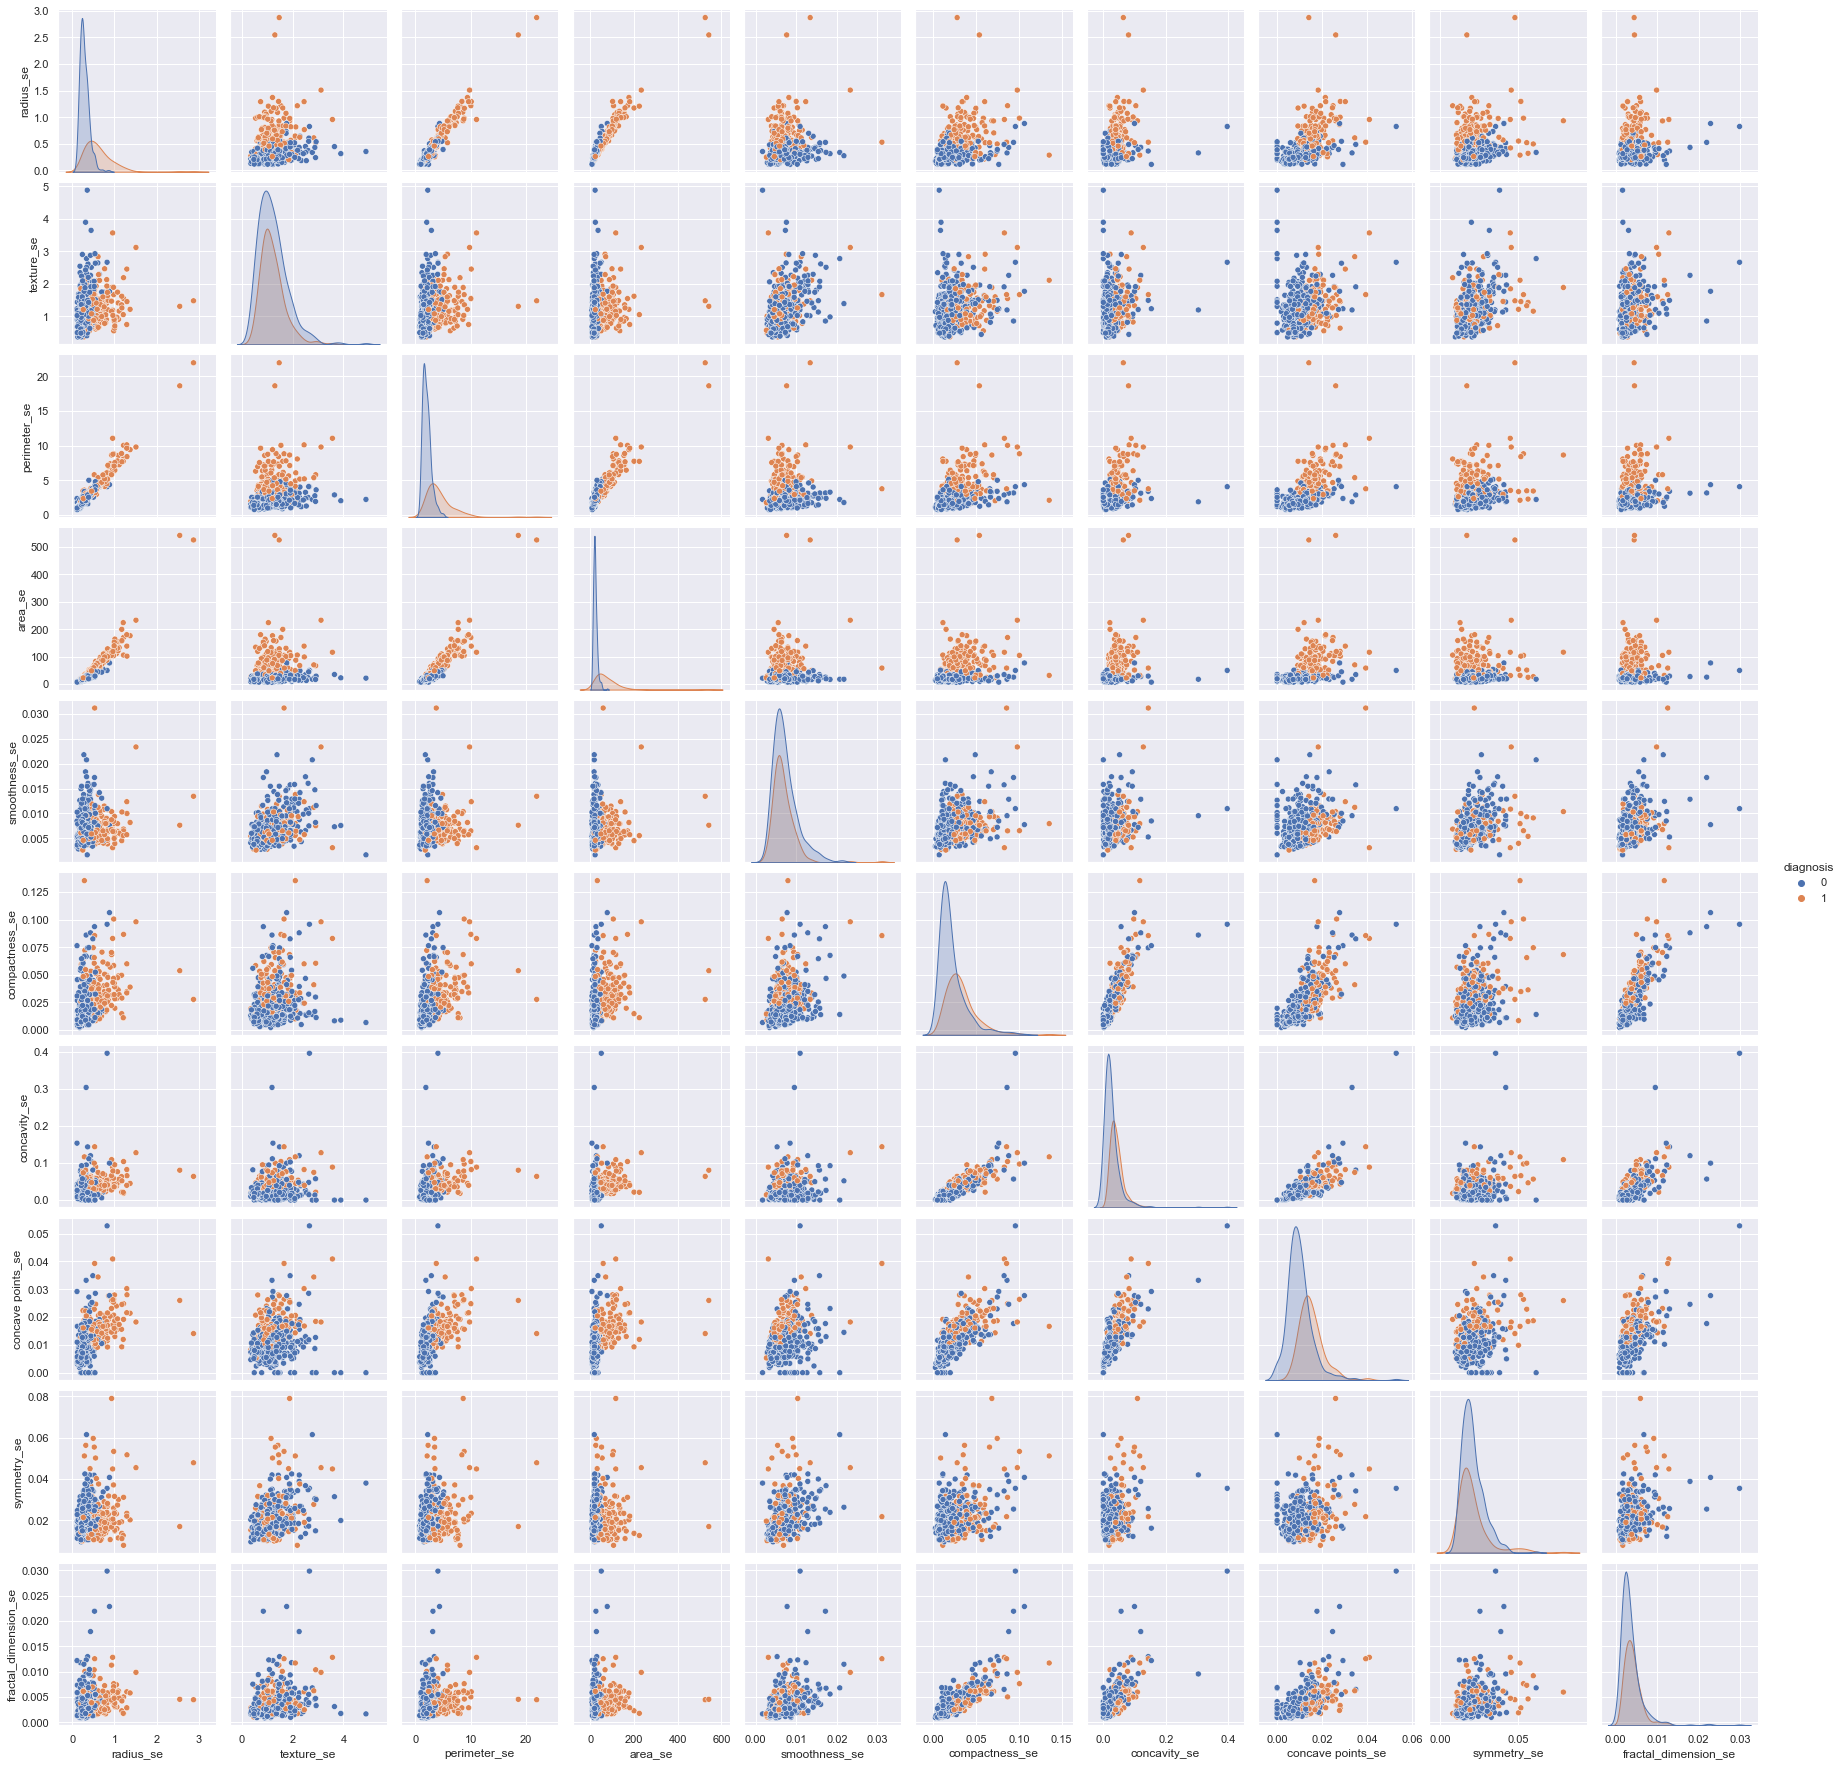

In [16]:
se=['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se']
sns.pairplot(data=data[se],hue="diagnosis")

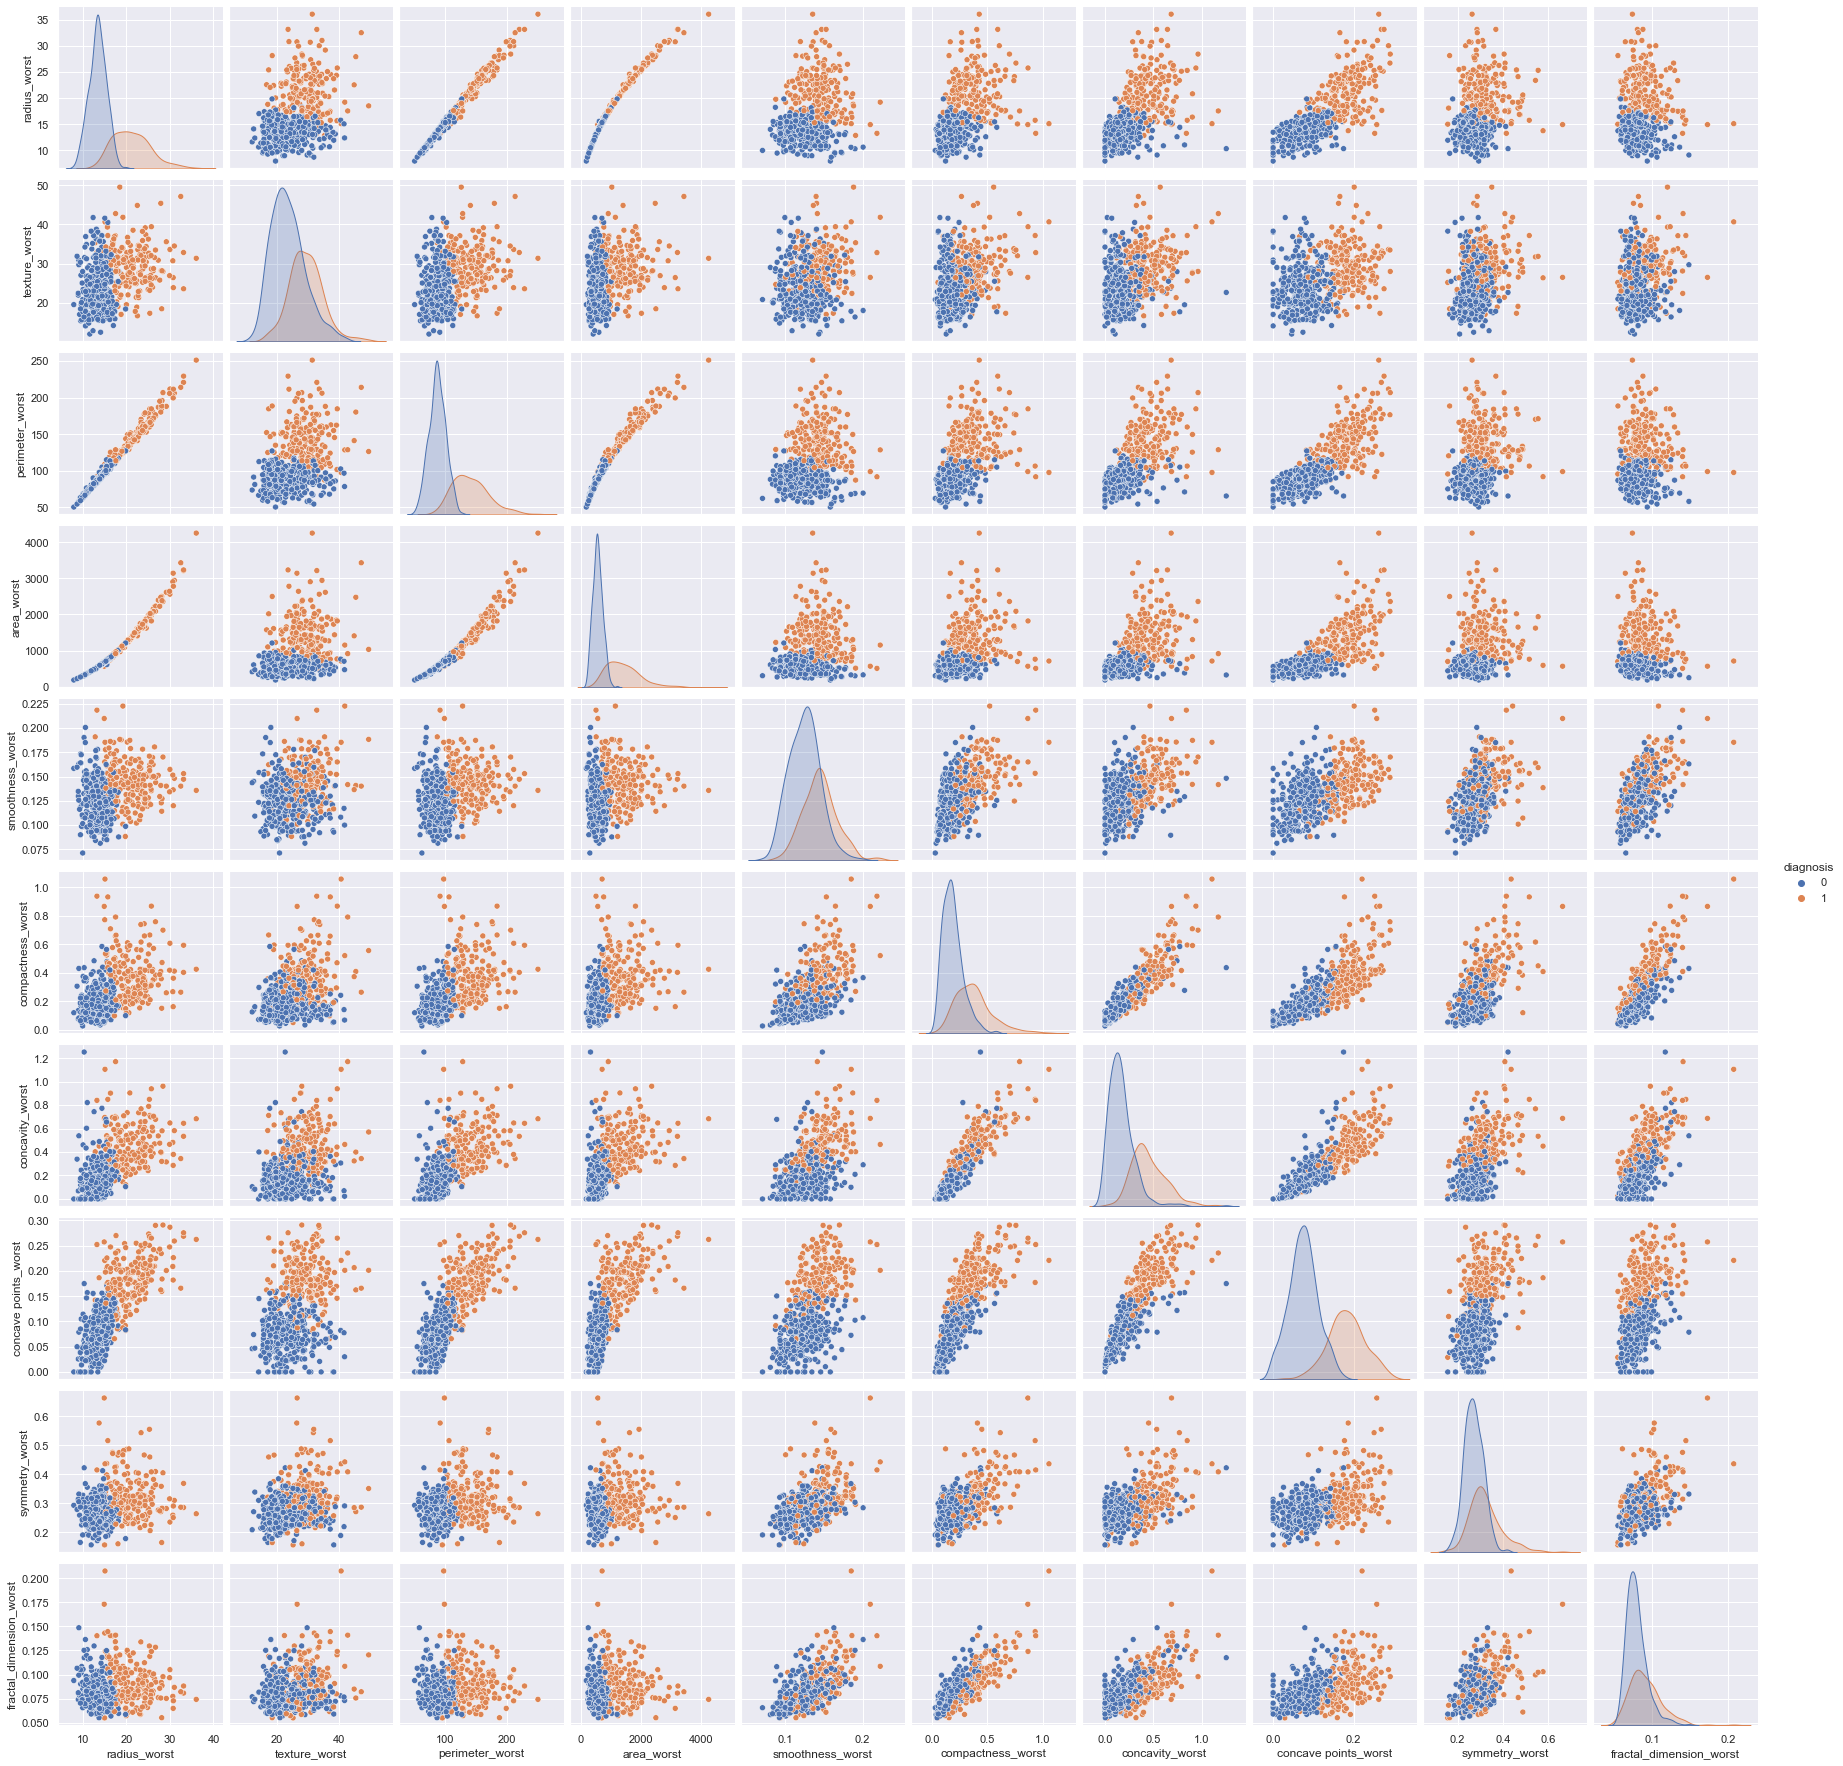

In [17]:
worst=['diagnosis','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
sns.pairplot(data=data[worst],hue="diagnosis")

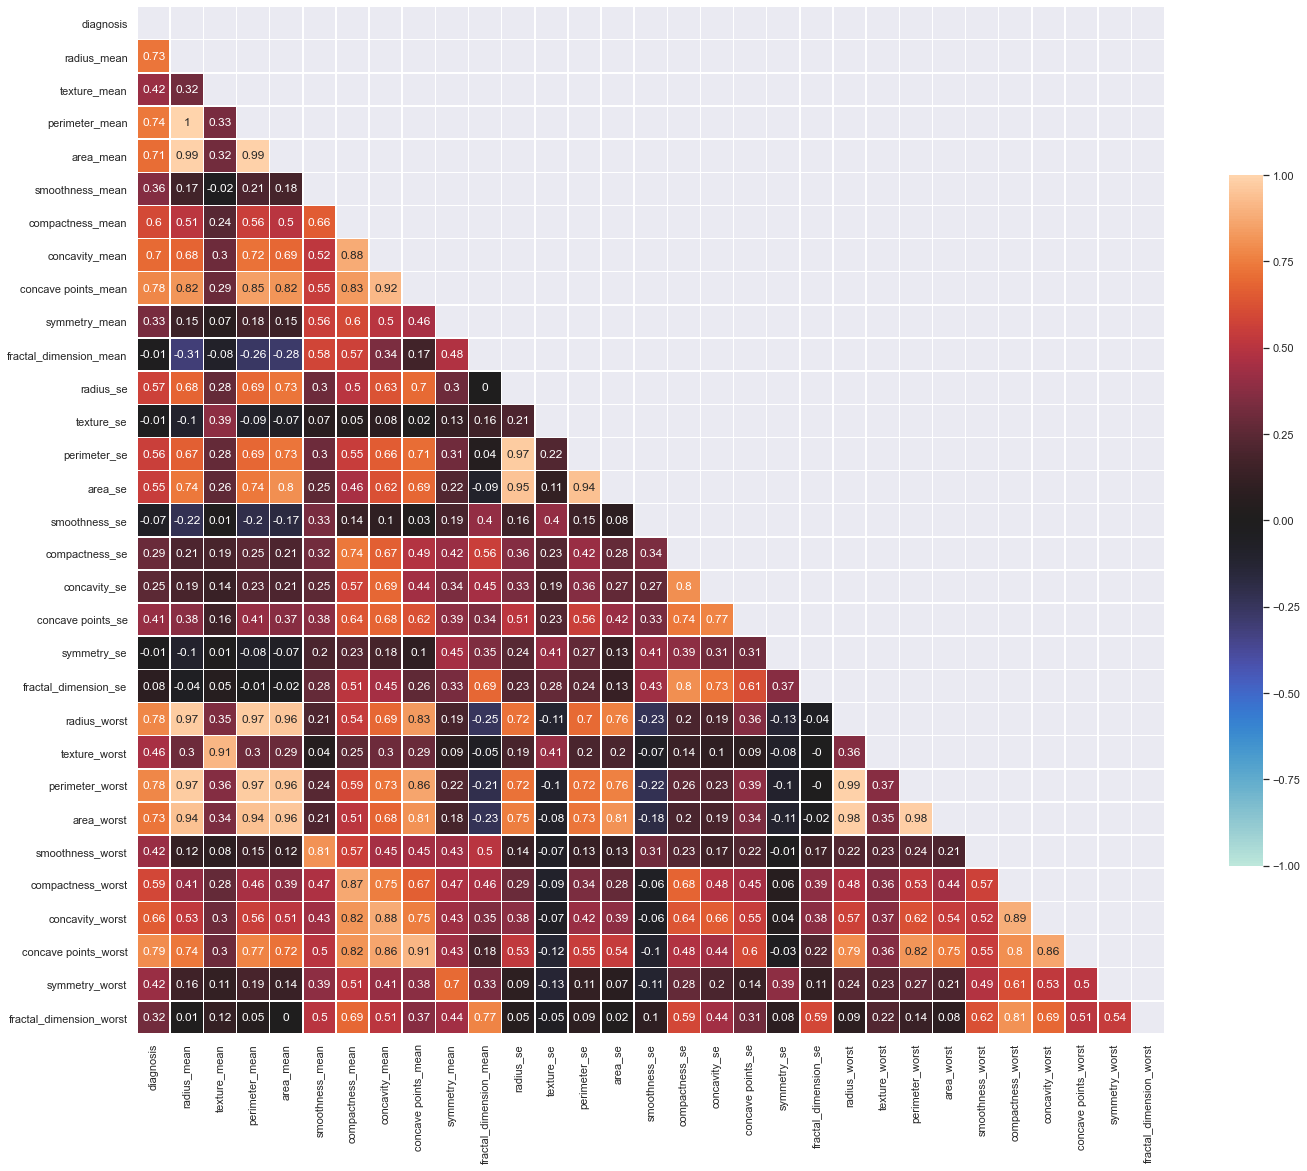

In [18]:
corr=data.corr().round(2)

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

fig, axis =plt.subplots(figsize=(20,20))

sns.heatmap(corr, mask=mask, vmin=-1,vmax=1,center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True )
plt.tight_layout()

In [19]:
worst=['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst','concave points_worst','symmetry_worst', 'fractal_dimension_worst']
data2=data.drop(worst,axis=1)

ar_per=['perimeter_mean', 'area_mean','perimeter_se', 'area_se']
data3=data2.drop(ar_per,axis=1)

conc=['concavity_mean', 'concave points_mean','concavity_se', 'concave points_se']
data4=data3.drop(conc,axis=1)

In [20]:
data4.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')

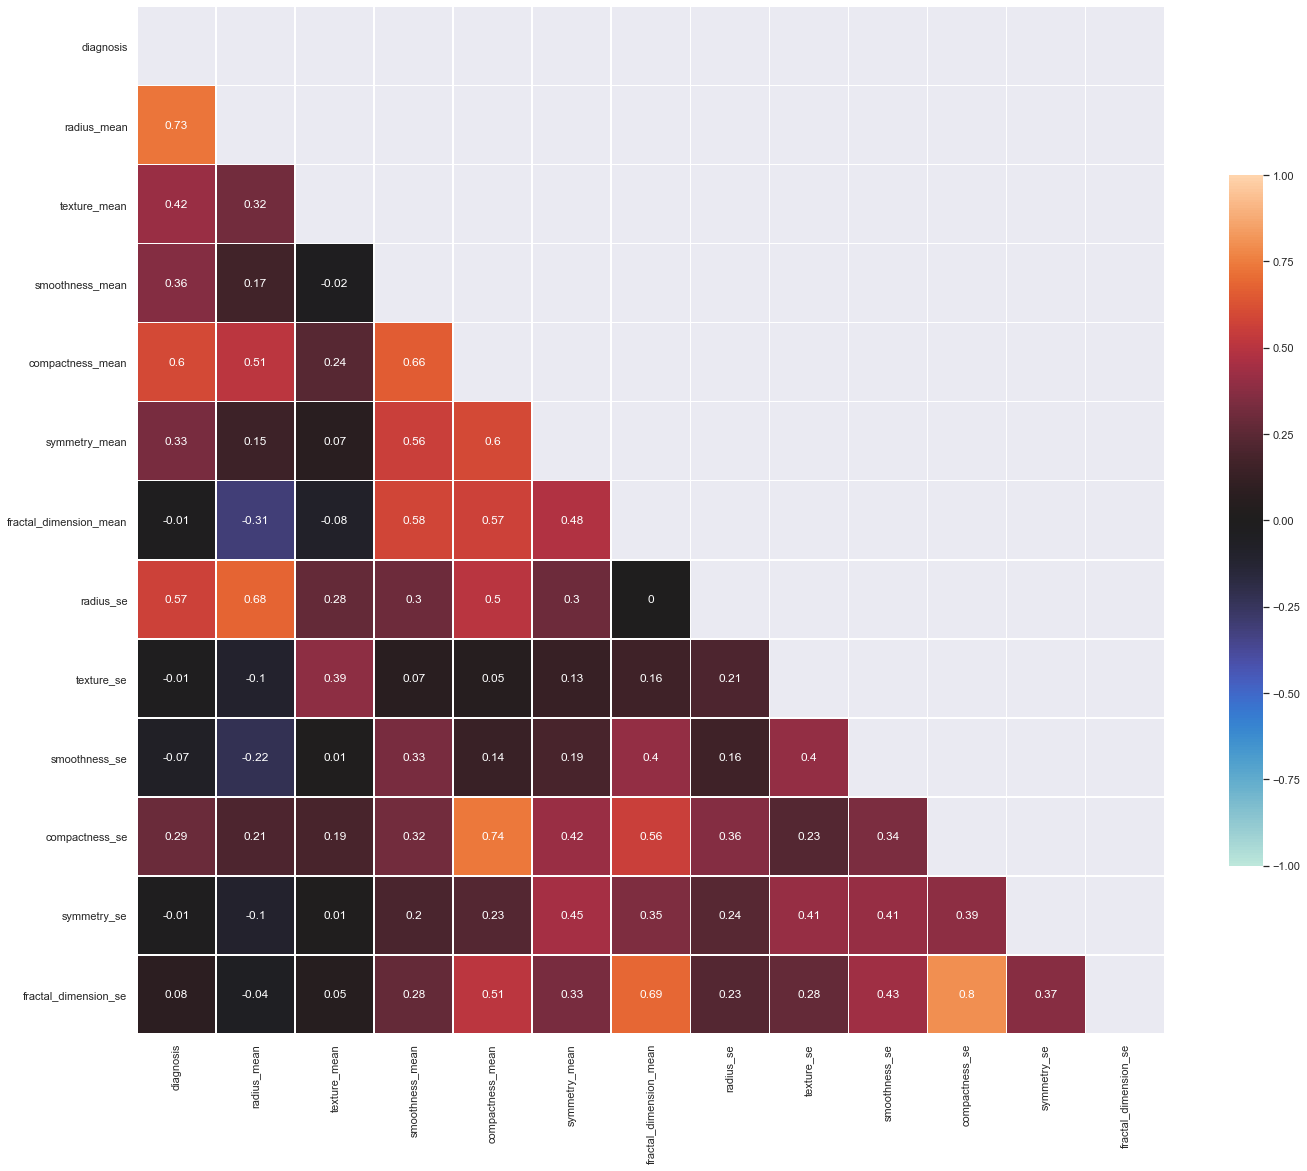

In [21]:
corr=data4.corr().round(2)

mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

fig, axis =plt.subplots(figsize=(20,20))

sns.heatmap(corr, mask=mask, vmin=-1,vmax=1,center=0, square=True, linewidths=0.5, cbar_kws={"shrink":0.5}, annot=True )
plt.tight_layout()

creamos nueva base de datos donde no hay tanta correlacion entre atributos

## 2.-

In [22]:
y=df.diagnosis
x=df.drop(["diagnosis"],axis=1)
standard_df = StandardScaler().fit_transform(x)
standard_df

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## 3.-

In [23]:
from sklearn.manifold import TSNE


In [24]:
b=[]
for i in range (1,3):
    b.append("DIM"+str(i))
print (b)

['DIM1', 'DIM2']


In [25]:
embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(standard_df)
    
df_tsne = pd.DataFrame(X_transform,columns = b)
df_tsne['diagnosis'] = y

In [26]:
df_tsne

DIM1       DIM2  diagnosis
0    26.113619  18.194149          1
1    23.730335   3.249626          1
2    26.338211  13.540263          1
3    14.568975  21.009804          1
4    29.195854   3.062558          1
..         ...        ...        ...
564  32.584190  11.956052          1
565  31.968180   6.771573          1
566  17.129934   1.284731          1
567  28.008781  17.024183          1
568 -21.807583 -13.727716          0

[569 rows x 3 columns]

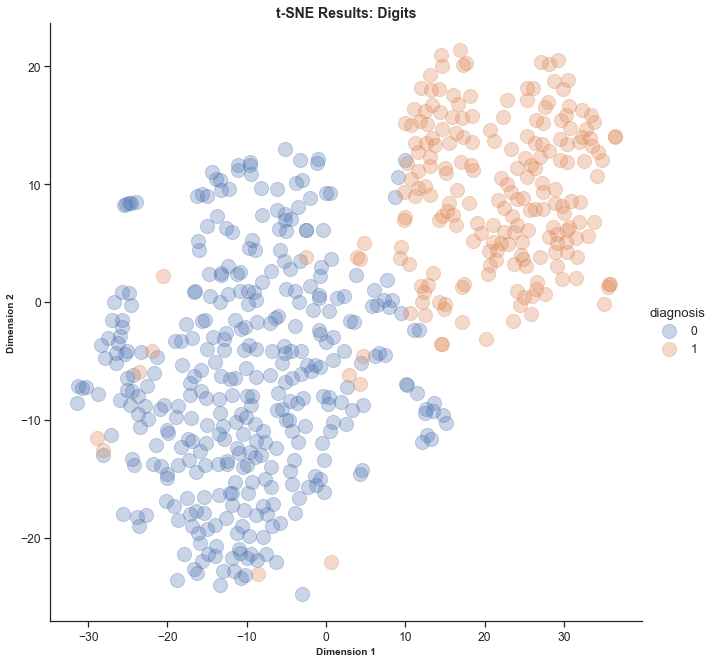

In [27]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='DIM1',
           y='DIM2',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='diagnosis',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

## 4.-

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [29]:
x=df_tsne.drop(["diagnosis"],axis=1)
y=df_tsne.diagnosis

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=40)

In [31]:
rlog = LogisticRegression()
rlog.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred=y_test
model_pred=rlog.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    0.9590643274853801
recall:      0.9642857142857143
precision:   0.9152542372881356
f-score:     0.9391304347826087



In [33]:
X = x.values
Y = y.values

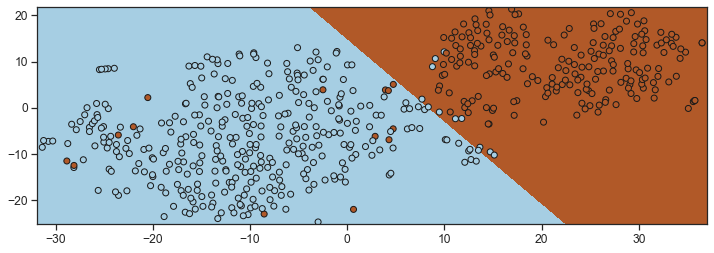

In [34]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = rlog.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

In [35]:
from sklearn import svm

In [36]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [37]:
param=["linear", "poly", "rbf", "sigmoid"]

In [45]:
for i in range(len(param)):
    clf = svm.SVC(kernel=param[i])
    clf.fit(X_train, y_train)
    y_pred=y_test
    model_pred=clf.predict(X_test)
    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_pred, model_pred))
    print('recall:     ',recall_score(y_pred, model_pred))
    print('precision:  ',precision_score(y_pred, model_pred))
    print('f-score:    ',f1_score(y_pred, model_pred))
    print("")
    


Metricas:
 
accuracy:    0.9707602339181286
recall:      0.9642857142857143
precision:   0.9473684210526315
f-score:     0.9557522123893805


Metricas:
 
accuracy:    0.9707602339181286
recall:      0.9107142857142857
precision:   1.0
f-score:     0.9532710280373832


Metricas:
 
accuracy:    0.9707602339181286
recall:      0.9642857142857143
precision:   0.9473684210526315
f-score:     0.9557522123893805


Metricas:
 
accuracy:    0.9181286549707602
recall:      0.9464285714285714
precision:   0.828125
f-score:     0.8833333333333333



In [47]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred=y_test
model_pred=clf.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    0.9707602339181286
recall:      0.9642857142857143
precision:   0.9473684210526315
f-score:     0.9557522123893805



mejor parametro

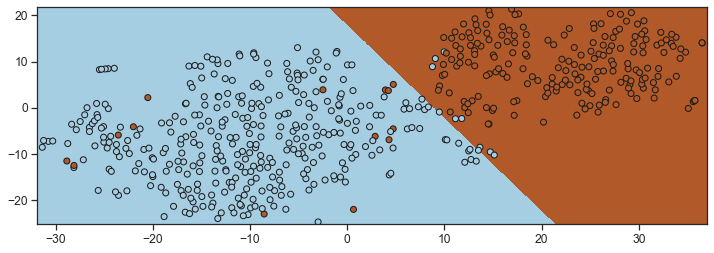

In [48]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

In [51]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [56]:
c1=[]
c2=[]
for i in range(10):
    clf1 = DecisionTreeClassifier(max_depth=i+2)
    clf2 = KNeighborsClassifier(n_neighbors=i+2)
    clf1 = clf1.fit(X, y)
    clf2 = clf2.fit(X, y)
    y_pred=y_test
    model_pred=clf1.predict(X_test)
    c1.append((i+2,f1_score(y_pred, model_pred)))
    y_pred=y_test
    model_pred=clf2.predict(X_test)
    c2.append((i+2,f1_score(y_pred, model_pred)))

In [57]:
print(c1)

[(2, 0.9642857142857143), (3, 0.9642857142857143), (4, 0.9818181818181818), (5, 0.9821428571428571), (6, 0.9909909909909909), (7, 0.9909909909909909), (8, 1.0), (9, 1.0), (10, 1.0), (11, 1.0)]


In [58]:
print(c2)

[(2, 0.9818181818181818), (3, 0.972972972972973), (4, 0.9818181818181818), (5, 0.9818181818181818), (6, 0.9818181818181818), (7, 0.972972972972973), (8, 0.972972972972973), (9, 0.972972972972973), (10, 0.972972972972973), (11, 0.972972972972973)]


In [59]:
clf1 = DecisionTreeClassifier(max_depth=8)
clf1 = clf1.fit(X, y)
y_pred=y_test
model_pred=clf1.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    1.0
recall:      1.0
precision:   1.0
f-score:     1.0



In [60]:
clf2 = KNeighborsClassifier(n_neighbors=2)
clf2 = clf1.fit(X, y)
y_pred=y_test
model_pred=clf2.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    1.0
recall:      1.0
precision:   1.0
f-score:     1.0



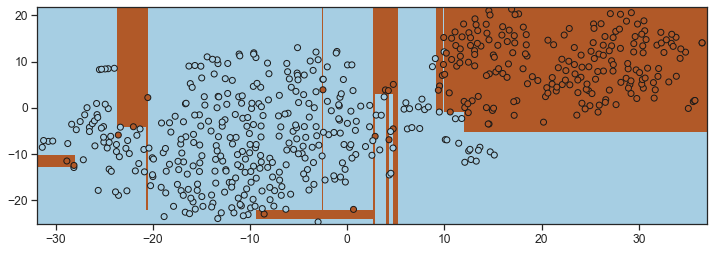

In [61]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

In [62]:
clf3 = SVC(kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],voting='soft', weights=[2, 1, 2])

In [63]:
clf3 = clf3.fit(X, y)
eclf = eclf.fit(X, y)

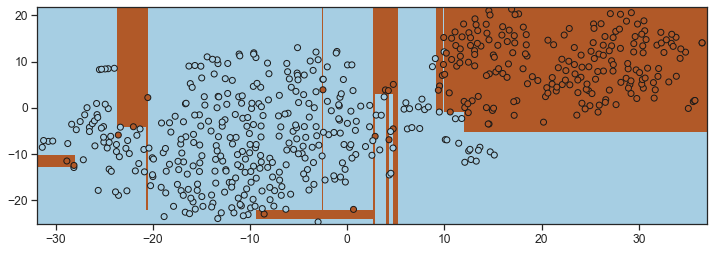

In [64]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

In [65]:
y_pred=y_test
model_pred=clf3.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    0.9883040935672515
recall:      0.9642857142857143
precision:   1.0
f-score:     0.9818181818181818



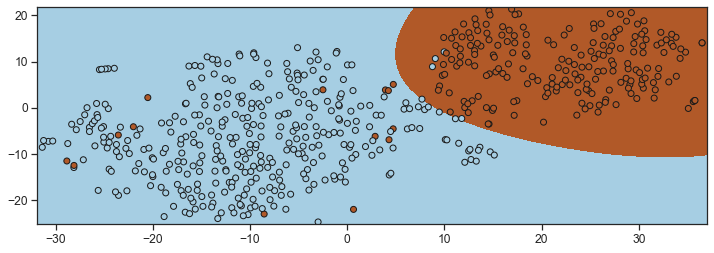

In [67]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

In [66]:
y_pred=y_test
model_pred=eclf.predict(X_test)
print('\nMetricas:\n ')
print('accuracy:   ',accuracy_score(y_pred, model_pred))
print('recall:     ',recall_score(y_pred, model_pred))
print('precision:  ',precision_score(y_pred, model_pred))
print('f-score:    ',f1_score(y_pred, model_pred))
print("")


Metricas:
 
accuracy:    0.9941520467836257
recall:      0.9821428571428571
precision:   1.0
f-score:     0.9909909909909909



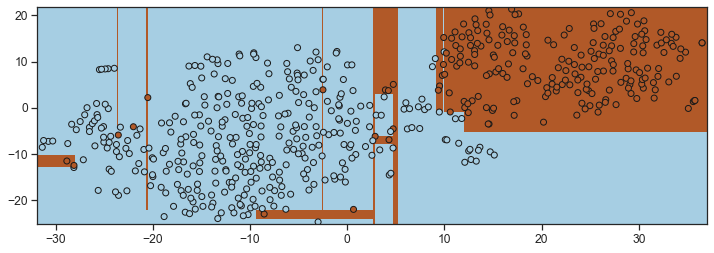

In [68]:
plt.figure(figsize=(12,4))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = eclf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
#plt.xlabel('Sepal length')
#plt.ylabel('Sepal width')
plt.show()

notamos que los datos son muy ideales porque en varios modelos llegamos a una prediccion extraordinariamente buena. es  interesante notar que varios modelos lleguen a resultados similares con procesos diferenttes y la importancia de los parametros.